Hay una formula a seguir a la hora de juntar jugadores para que formen una pareja de padel?

El objetivo del trabajo es evaluar si hay combinaciones entre jugadores de padel que tengan mas probabilidades de ganar un partido y tambien si hay combinaciones con pocas probabilidades de exito. Para esto analizaremos las estadisticas de juego de cada uno y las estadisticas de los partidos, diferenciando equipo que ganó el set y equipo que lo perdió

Un aspecto particular del padel es que se puede cambiar de pareja varias veces al año, si un jugador quiere cambiar de compañero, lo puede hacer sin restricciones. Esto es una herramienta muy utilizada por los jugadores para sobrellevar los malos resultados, con sus pros y contras


Aplicacion estrategica: es importante destacar, que a diferencia de otros deportes, el padel es un deporte en crecimiento y los premios monetarios que representan una real diferencia económica son para los primeros puestos del torneo, por lo que, encontrar una fórmula para maximizar las posibilidades de terminar entre los primeros, es decisivo para la carrera de un jugador de padel profesional y los entrenadores, que también van cambiando según cambian las parejas. 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
df_data = pd.read_excel("_ml_jug.xlsx")

Análisis del dataset

In [4]:
df_data.shape

(1256, 26)

In [5]:
df_data.columns

Index(['nombre', 'edad', 'alt', 'pos', 'torneo', 'set', 'saque', 'NF_total',
       'w_total', 'sm_total', 'nsmtotal', 'prec sm%', 'csm', 'fondo', 'm3',
       'm5', 'm7', 'pts_ganados', 'games_jug', 'circuito', 'fase', 'mano',
       'spcsm', 'bloc', 'partido', 'nfr'],
      dtype='object')

In [6]:
round(df_data.describe(),2)

,edad,alt,saque,NF_total,w_total,sm_total,nsmtotal,prec sm%,csm,fondo,m3,m5,m7,pts_ganados,games_jug,spcsm,bloc,nfr
count,1256.00,1256.00,1256.0,1256.00,1256.00,1256.00,1256.00,940.00,1256.00,1256.00,1256.00,1256.00,1256.00,1256.00,1256.00,552.00,552.00,192.00
mean,27.04,1.81,1.5,2.01,3.45,1.61,0.85,64.90,0.36,0.25,1.06,1.74,3.69,6.49,4.72,0.45,0.17,1.58
std,6.03,0.05,0.5,1.56,2.41,1.76,1.16,33.92,0.69,0.53,1.23,1.56,2.27,3.36,0.88,0.71,0.48,1.39
min,18.00,1.67,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00
25%,23.00,1.76,1.0,1.00,2.00,0.00,0.00,50.00,0.00,0.00,0.00,1.00,2.00,4.00,4.00,0.00,0.00,0.00
50%,26.00,1.80,1.5,2.00,3.00,1.00,0.00,67.00,0.00,0.00,1.00,1.00,3.00,6.00,5.00,0.00,0.00,1.00
75%,29.00,1.85,2.0,3.00,5.00,2.00,1.00,100.00,1.00,0.00,2.00,3.00,5.00,9.00,5.00,1.00,0.00,3.00
max,47.00,1.90,2.0,9.00,13.00,9.00,7.00,100.00,6.00,3.00,9.00,9.00,15.00,17.00,6.00,3.00,3.00,6.00


In [7]:
df_data.isna().sum()

nombre            0
edad              0
alt               0
pos               0
torneo            0
set               0
saque             0
NF_total          0
w_total           0
sm_total          0
nsmtotal          0
prec sm%        316
csm               0
fondo             0
m3                0
m5                0
m7                0
pts_ganados       0
games_jug         0
circuito          0
fase              0
mano              0
spcsm           704
bloc            704
partido         704
nfr            1064
dtype: int64

Hay valores NaN en prec sm% - esto seria la efectividad de los remates, pero como hay jugadores que no rematan en un set, para no computar un 0 en su promedio, se lo deja como Nan. Al hacer la media total de cada caracteristica, este valor va a dejar de ser Nan porque todos los jugadores remataron al menos una vez
Las ultimas 4 caracteristicas van a ser borradas del df ya que no hay de todos los jugadores, y no son importantes

In [42]:
df_data["nombre"].nunique()

52

Aprendizaje no supervisado - KMEANS

Se va a crear un df dividiendo las caracteristicas por la cantidad de games jugados.
Se eligieron las 3 columnas mas relevantes al analizar partidos, como son los puntos por game (pxg), errores no forzados por game (nfxg) y remates por game (rem)

In [8]:
df_clean = pd.DataFrame()
df_clean = df_clean.assign(name = df_data["nombre"])
df_clean = df_clean.assign(pxg = df_data["pts_ganados"]/df_data['games_jug'])
df_clean= df_clean.assign(nfxg = df_data["NF_total"]/df_data['games_jug'])
df_clean = df_clean.assign(rem = (df_data["sm_total"] + df_data["nsmtotal"])/df_data['games_jug'])

df_clean = df_clean.groupby("name")[["pxg","nfxg","rem"]].mean().sort_values(by="pxg", ascending=False)

#nombre de los jugadores 
df_clean_index = df_clean.index
df_clean.reset_index(inplace =True, drop=True)

df_clean1 = df_clean
df_clean = df_clean.values




C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a m

Text(0, 0.5, 'Inercia')

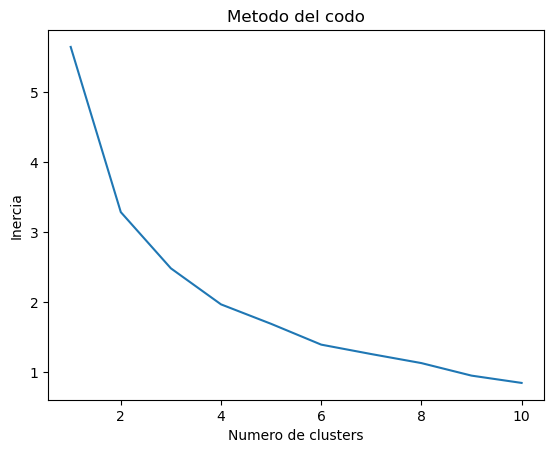

In [9]:
wcss = []
for i in range(1, 11):
    codo = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    codo.fit(df_clean)
    wcss.append(codo.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')

Si bien las posibilidades para agrupar podrian ser desde 2 cluster hasta 4, el análisis previo del deporte divide a los jugadores en 3 grupos: Los que se destacan por la cantidad de puntos que hacen(ofensivos), los que se destacan defensivamente (defensivos), y en el medio jugadores hibridos, asi que elegimos separar a los jugadores en 3 clusters

Instanciar modelo 

In [10]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
pred_y = model.fit_predict(df_clean)




C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


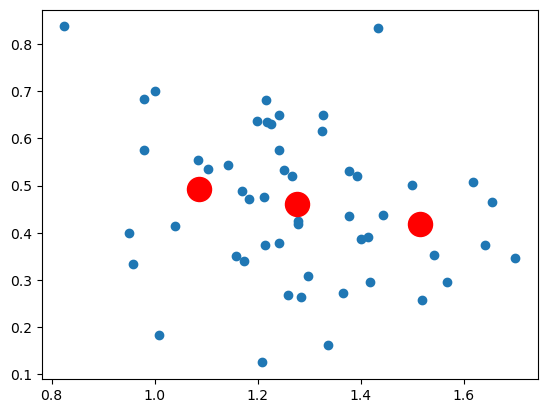

In [11]:
plt.scatter(df_clean[:,0], df_clean[:,1])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Como los datos estan cerca pero no comprimidos, me pareció que es mejor dejar los outliers porque sino menos dispersos estarian los datos, y mas cerca entre si los centromeros, siendo minima la diferencia entre ir a un grupo u otro.

Preprocesado y modelado

Porcentaje de varianza explicada por cada componente
[0.56332144 0.31139723 0.12528134]


Text(0, 0.5, 'Por. varianza explicada')

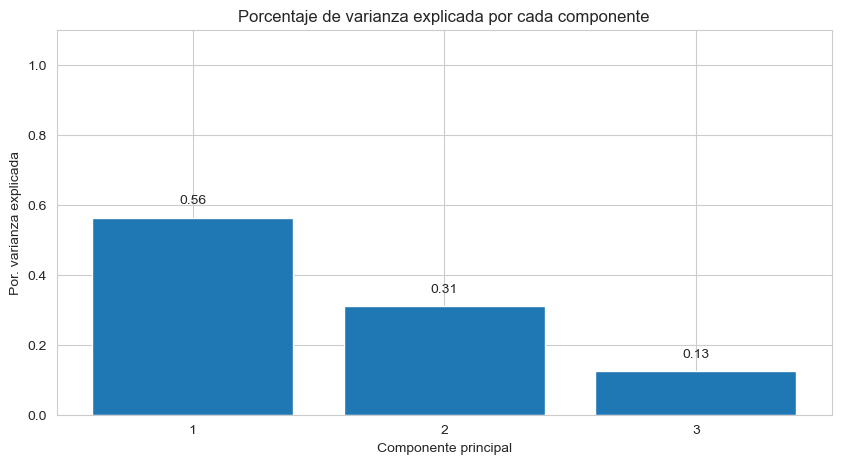

In [12]:
df_cluster =df_clean1
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_cluster)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)


import seaborn as sns;sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(df_cluster.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

El PCA mostró la columna puntos por game como la que mejor explica al modelo - 56%. Esto concuerda con la division de roles de una pareja, en la cual si hay un jugador que hace pocos puntos se junta con uno que haga muchos puntos. Y, en el medio, hay jugadores que son mas hibridos, los cuales tienen un rendimiento variado en cuanto a los puntos por game y los errores no forzados que cometen. Como veremos en el siguiente grafico, al agregar los remates, se puede ver que tambien esta columna podria dividir en los mismos cluster a los jugadores, a pesar de que en el PCA explica el 13% de la varianza. Esto deja a entrever que los jugadores que mas puntos hacen aprovechan la via del remate para hacerlos

In [13]:
#Graficar clusters

#model con cluster
modelcc = model.fit(df_clean)

#obtener labels del modelo fitteado
labels = modelcc.labels_

#agregar los labels al df
df_clean1['cluster_label'] = labels

#representamos puntos y centroides
# Obtener los Centroides
centroids = modelcc.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


#cambiar el index por nombres de los jugadores
df_clean1.set_index(df_clean_index, inplace=True)
#print(cc1.sort_values("cluster_label"))
maskcc0 = (df_clean1['cluster_label'] == 0)
maskcc1 = (df_clean1['cluster_label'] == 1)
maskcc2 = (df_clean1['cluster_label'] == 2)


#colores
fondo = "#313332"
verde_lindo = "#46f892"
verde_claro = "#b5fdcd"
scattermedia ="#42424d" #alpha=0.9
text_color = "w"
color_set1 = '#3ff294' # gran verde
color_set2 = '#f4aa51' # amarillo arena naranja
celeste = "#31acce" 
celeste_claro = "#c1e6f0"


# Obtén las coordenadas de los puntos
x = df_clean1['pxg']
y = df_clean1['rem']
names = df_clean_index  # Nombres de los puntos

C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Los datos de cada jugador en particular por game

In [14]:
df_clean1.head()

,pxg,nfxg,rem,cluster_label
name,,,,
Dalbianco,1.700000,0.346970,0.709848,0
Paquito,1.653968,0.465079,0.649206,0
Tolito,1.641667,0.375000,0.486667,0
Stupa,1.617614,0.508333,0.728220,0
Coello,1.568414,0.294758,0.746640,0


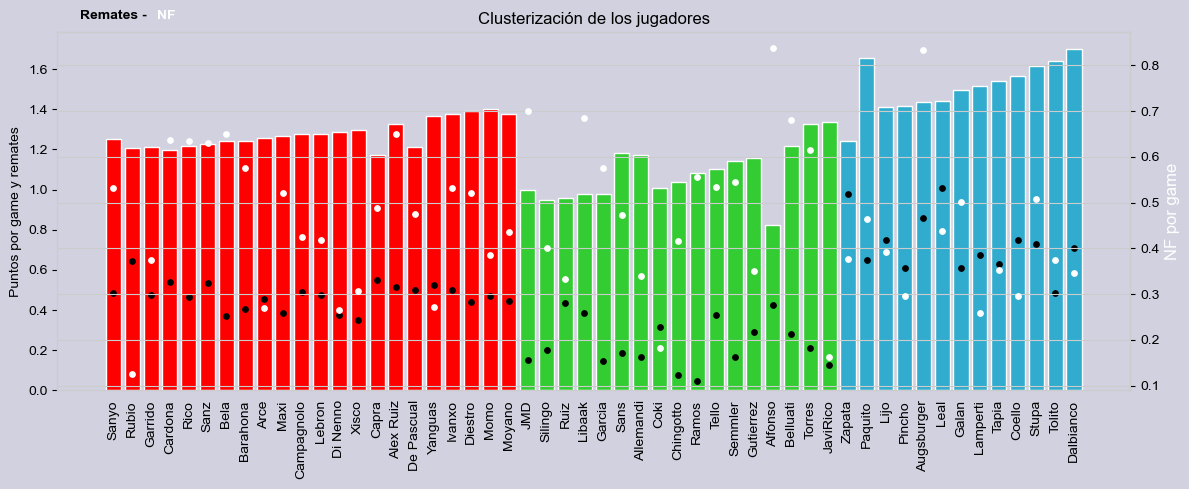

In [15]:
def g_bar(df):
    # Crea el gráfico scatter con nombres
    df= df.sort_values("cluster_label", ascending=False)
    
    fig, ax = plt.subplots(figsize=(12,5))
    fig.set_facecolor("#d1d1e0")
    name1 = "pts x game"
    name2 = "NF"
    name3 = "Rem"
    
    width = 0.2
    index = np.arange(3)
    
    

    verde_lindo= "#33cc33"
    ax.patch.set_facecolor("#d1d1e0")
    #sns.barplot(x= df.index, y=df["rem"], hue=df["cluster_label"])
    # Define una paleta de colores personalizada
    colores = [celeste, verde_lindo, "red"]

    # Asigna colores a las barras en función de los valores de "cluster_label"
    colores_barras = [colores[label] for label in df["cluster_label"]]
    ax.bar(df.index, df["pxg"], color=colores_barras)
    ax.scatter(df.index, df["rem"], color ="black", s=15)
    plt.xticks(rotation=90)
    ax.set_ylabel("Puntos por game y remates", color = "black")
    
    #compartir eje x 
    ax2 = ax.twinx()
    ax2.scatter(df.index, df["nfxg"], color ="white",s=15) 
    ax2.set_ylabel("NF por game", color = "white", fontsize=12)

    #cambiar colores
    ax.tick_params(axis="y", colors="black")
    ax2.tick_params(axis="y", colors="black")
    ax.tick_params(axis="x", colors="black")
   
    
    plt.title("Clusterización de los jugadores", color="black")
    ax.xaxis.grid(False)  # Desactivar las líneas de la cuadrícula en el eje x
    ax.yaxis.grid(False)
    #ax.grid(False)
    #ax2.grid(False)
    ax.text(0.1, 1.85, "Remates - ", color="black", weight='bold', ha='center')
    ax.text(2.8, 1.85, "NF", color="white", weight='bold', ha='center')
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
g_bar(df_clean1)

Evaluacion de silhouette

In [16]:
df_clean1.head(2)

,pxg,nfxg,rem,cluster_label
name,,,,
Dalbianco,1.700000,0.346970,0.709848,0
Paquito,1.653968,0.465079,0.649206,0


In [17]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

valor_x = df_clean1.drop("cluster_label", axis=1).values

valor_y = df_clean1.cluster_label.values

sc = StandardScaler()
valor_x_norm =sc.fit_transform(valor_x)
slc = {}

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=10).fit(valor_x_norm)
    clusters =kmeans.labels_
    slc[k] = silhouette_score(valor_x_norm, clusters)
    
slc


C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\UsuarioW10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with

{2: 0.34557124327074223,
 3: 0.29393550792282697,
 4: 0.30658349381300515,
 5: 0.32198576028407583}

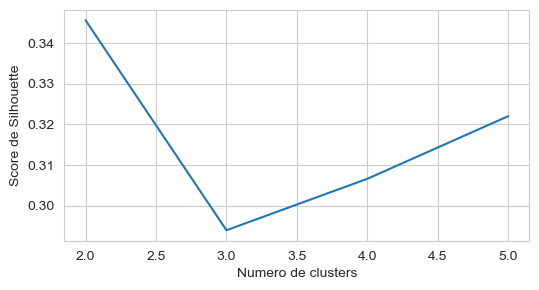

In [18]:
plt.figure(figsize=(6,3))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

Análisis del ranking según clusters

Cluster 1: jugadores que realizan menos remates que la media es el rasgo principal. Tambien, suelen cometer mas errores no forzados que la media, y la cantidad de puntos es variada, pero suelen hacer entre la media y menos.

Cluster 2: son jugadores hibridos, presentan valores intermedios entre el cluster 1 y 3.

Cluster 3: son jugadores que realizan mas puntos que la media y mas remates. Errores no forzados es variado.

Parejas segun ranking:

Numero 1: son 2 jugadores del cluster 3.Ambos estan por encima del percentilo 85 en puntos por game, única pareja que tiene a 2 jugadores con tantos puntos, y ademas son la pareja que menos errores no forzados comete. Hacen muchos puntos y otorgan pocos al rival. Como detalle no menor, tambien son los que mas rematan, teniendo una de las efectividades mas altas además. Se encuentran invictos.

Numero 2: tiene un jugador del cluster 3 y el otro es un hibrido, cluster 2, que tiene partidos en los cuales se vuelve mas ofensivo y tiene menos errores no forzados que su compañero

Numero 3: tiene un jugador del cluster 3 y el otro es un hibrido, cluster 2, que tiene partidos en los cuales se vuelve mas defensivo y es de los que menos errores no forzados tiene en el torneo

Numero 4: tiene 2 jugadores hibridos, cluster 2. Uno de ellos el que mas puntos hace por game en el cluster 2 y con pocos errores no forzados. En cambio, su pareja, tiene rendimientos mas variado, sobretodo en lo que respecta a errores no forzados.

Numero 5: tiene un jugador del cluster 3, siendo el que mas puntos hace en el torneo, y a un jugador del cluster 1, quien hace pocos puntos (los termina haciendo su compañero) y comete muy pocos errores no forzados

Esto denota que no hay una formula única en el armado de parejas con respecto a los roles de cada jugador

En cuanto a las combinaciones con pocas probabilidades de exito: es una tentación juntar 2 jugadores que hagan muchos puntos por game, sin embargo, estos jugadores suelen estar por encima del percentilo 50 en errores no forzados, y juntar a jugadores que "compitan" por hacer puntos y se "hundan" por los errores no forzados no ha tenido buenos resultados; excepto los actuales numero 1, pero ellos comenten muy pocos errores no forzados, ambos

Numero 1: son 2 jugadores del cluster 3.Ambos estan por encima del percentilo 85 en puntos por game, única pareja que tiene a 2 jugadores con tantos puntos, y ademas son la pareja que menos errores no forzados comete. Hacen muchos puntos y otorgan pocos al rival. Como detalle no menor, tambien son los que mas rematan, teniendo una de las efectividades mas altas además. Se encuentran invictos.

In [19]:
def jug_valor(df,name, name2=0):
        
    pxg= df.loc[name, "pxg"]
    nfxg= df.loc[name, "nfxg"]
    rem= df.loc[name, "rem"]
        
    if name2 != 0:
        pxg2= df.loc[name2, "pxg"]
        nfxg2= df.loc[name2, "nfxg"]
        rem2= df.loc[name2, "rem"]
        
        pxg = pxg + pxg2
        nfxg =nfxg + nfxg2
        rem = rem + rem2
            
    
    return round(pxg,2), round(nfxg,2),round(rem,2)
df_clean1.head(2)


,pxg,nfxg,rem,cluster_label
name,,,,
Dalbianco,1.700000,0.346970,0.709848,0
Paquito,1.653968,0.465079,0.649206,0


In [20]:
tapia_pxg, tapia_nfxg, tapia_rem = jug_valor(df_clean1,"Tapia")
ltapia = [tapia_pxg, tapia_nfxg, tapia_rem]

coello_pxg, coello_nfxg, coello_rem =jug_valor(df_clean1,"Coello")
lcoello = [coello_pxg, coello_nfxg, coello_rem]

tap_coe_pxg, tap_coe_nfxg, tap_coe_rem = jug_valor(df_clean1,"Tapia", "Coello")
ltap_coe = [tap_coe_pxg, tap_coe_nfxg, tap_coe_rem] 

df_n1 = pd.DataFrame({"Puntos por game":[ltapia[0], lcoello[0], ltap_coe[0]],
                           "No forzados por game":[ltapia[1], lcoello[1], ltap_coe[1]],
                           "Remates": [ltapia[2], lcoello[2], ltap_coe[2]]}, 
                          index= ["Tapia", "Coello","Equipo"]).T

#f_n1["percentilo "]
#df_n1 =df_n1.T

df_n1
                          

                           

,Tapia,Coello,Equipo
Puntos por game,1.54,1.57,3.11
No forzados por game,0.35,0.29,0.65
Remates,0.63,0.75,1.38


Análisis teniendo en cuenta quién gana o pierde o empata (tiebreak) el set

In [21]:
#dataset con los datos por equipo con resultado - df_gop (gano o perdio)
df_gop = pd.read_excel("_ml1_eqxset.xlsx")

In [22]:
df_gop.shape

(196, 28)

In [47]:
df_gop.index.nunique()

18

In [23]:
#quitar outlier de sd en bruselas 3er set
df_gop.drop(49, axis=0, inplace=True)
df_gop

,nombre,nf,w,sm,ns,prec,csm,fondo,m3,m5,...,games jug,sk_oro,resto_oro,op quiebre,circuito,torneo,fase,gano_set,nfr,partido
0,Tap-Coe,2,11,3,4,43,1,4,9,11,...,10,100.0,NaN,100.0,WPT,Vigo,Final,g,NaN,tcvsgc
1,Gal-Leb,10,16,6,1,86,3,0,4,1,...,10,NaN,0.0,0.0,WPT,Vigo,Final,p,NaN,tcvsgc
2,Tap-Coe,9,22,12,5,71,2,1,2,11,...,12,100.0,33.0,25.0,WPT,Vigo,Final,tb,NaN,tcvsgc
3,Gal-Leb,10,21,9,4,69,2,2,8,9,...,12,67.0,0.0,50.0,WPT,Vigo,Final,tb,NaN,tcvsgc
4,Tap-Coe,4,25,10,10,50,4,1,2,10,...,12,67.0,0.0,38.0,WPT,Vigo,Final,tb,NaN,tcvsgc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Stupa-Di,7,23,12,5,71,5,2,6,12,...,12,100.0,0.0,33.0,WPT,Vallalodid,Final,tb,NaN,tcvsgc
192,Tap-Coe,7,17,13,2,87,1,1,6,7,...,9,100.0,0.0,33.0,WPT,Viena,Cuartos,g,NaN,tcvsgc
193,Garrido-Campa,8,8,4,2,67,1,2,6,8,...,9,100.0,0.0,0.0,WPT,Viena,Cuartos,p,NaN,tcvsgc
194,Tap-Coe,3,23,7,10,41,2,2,8,7,...,12,0.0,50.0,33.0,WPT,Viena,Cuartos,tb,NaN,tcvsgc


In [24]:
#cambiar index 
df_gop.set_index('nombre',inplace=True)

#df con games ganados
df_gano = df_gop[df_gop["gano_set"]=="g"]
all_cols = ['nf', 'w', 'sm', 'ns', 'csm', 'fondo', 'm3', 'm5',
       'm7', 'pto_tot', 'tot_snf', 'ed','games jug', "set"]

#res_col = ["nf", "pto_tot", "tot_snf","sm","ns", "games jug"]
res_col = ["nf", "pto_tot", "tot_snf", "games jug"]


df_gano = df_gano[res_col]

df_ganoxgame = round(df_gano.div(df_gano["games jug"], axis=0),3)
df_ganoxgame["result"] ="g"


#df con games perdidos
df_perdio = df_gop[df_gop["gano_set"]=="p"]
df_perdio = df_perdio[res_col]

df_perdioxgame = round(df_perdio.div(df_perdio["games jug"], axis=0),3)
df_perdioxgame["result"] ="p"

#concatenar los df gano y perdio 

all = pd.concat([df_ganoxgame, df_perdioxgame])
all.drop("games jug", axis=1, inplace=True)
all["result"] = np.where(all["result"] == "g",1,0)
all

,nf,pto_tot,tot_snf,result
nombre,,,,
Tap-Coe,0.200,2.900,1.900,1
Tap-Coe,0.556,3.444,2.222,1
Tap-Coe,0.600,3.200,1.800,1
Momo-Sanyo,0.900,2.800,1.900,1
Tap-Coe,0.900,2.800,1.900,1
...,...,...,...,...
Tap-Coe,1.100,2.700,1.600,0
Maxi-Capra,0.750,2.625,2.000,0
Stupa-Di,1.200,2.600,1.900,0


In [25]:
#analisis univariado
univ = all.describe().T.drop(["result"])
univ

,count,mean,std,min,25%,50%,75%,max
nf,165.0,0.859600,0.326264,0.143,0.625,0.889,1.000,2.167
pto_tot,165.0,2.769145,0.628634,1.143,2.300,2.800,3.222,4.000
tot_snf,165.0,1.907600,0.482738,0.571,1.571,1.900,2.250,3.143


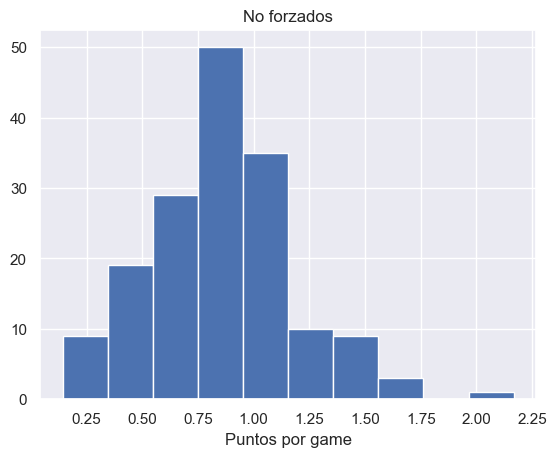

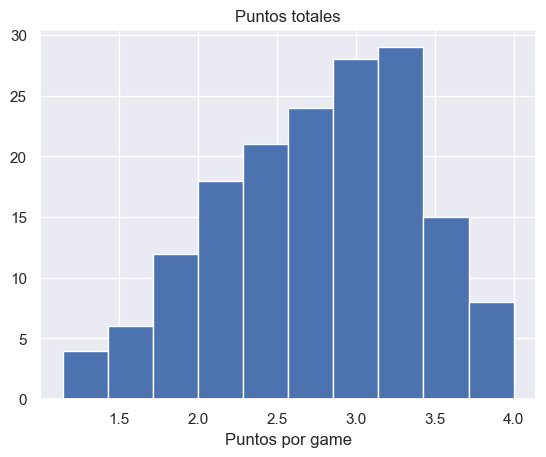

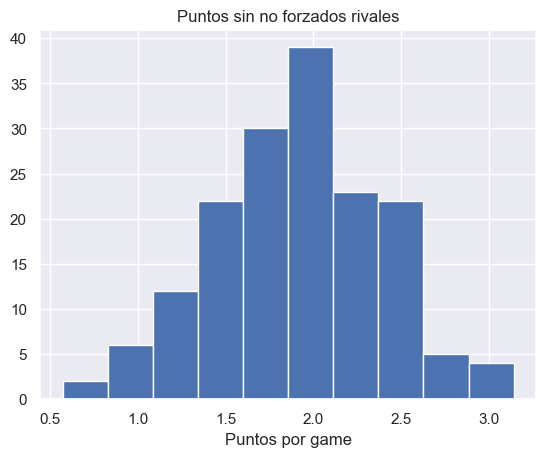

In [26]:
all_hist = all.drop("result", axis=1)
l_title = ["No forzados", "Puntos totales", "Puntos sin no forzados rivales"]
for i,g in enumerate(all_hist.columns):
    sns.set()
    plt.hist(all_hist[g])
    plt.xlabel("Puntos por game")
    plt.title(l_title[i])
    plt.show()

In [27]:
df_corr = all.corr()
df_corr.drop(["nf","pto_tot","tot_snf"], axis=1)

,result
nf,-0.523942
pto_tot,0.786128
tot_snf,0.675876
result,1.000000


nf: errores no forzados, pto_tot: puntos totales, tot_snf: puntos totales sin contar errores no forzados del rival, result: resultado, 1 es gana, 0 perder,

Hay una fuerte correlacion con result,(ganar) y los puntos que hace una pareja y los puntos totales con los puntos sin no forzados porque uno contiene al otro. Si bien se podría eliminar una de las columnas de los puntos, sirve tener las 2 columnas para diferenciar a los jugadores que hacen muchos puntos y tambien muchos errores no forzados de los que hacen muchos puntos y pocos errores no forzados, que son el ideal del padel y que mas sets ganan

Mientras que los errores no forzados muestran correlacion inversa con ganar, pero no tan fuerte como la cantidad de puntos hechos, ya que los puntos pueden superar a los errores no forzados y ganar el partido, a pesar de tener ambos valores altos

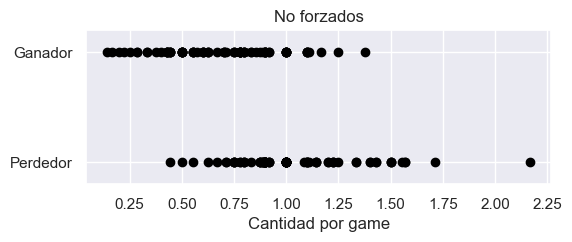

In [28]:
#errores no forzados 
plt.figure(figsize=(6, 2))
plt.scatter(all["nf"], all["result"], color="black")
plt.title("No forzados")
plt.yticks([0,1],["Perdedor","Ganador"])
plt.xlabel("Cantidad por game")
plt.margins(y=0.2)  # Ajusta el margen vertical

Se observa que hacer muy pocos errores no forzados (lo cual no es nada sencillo y suele ocurrrir cuando hay mucha diferencia en el ranking o una pareja en particular que son los numero 1 del ranking) es un buen predictor del triunfo del set.

Los errores no forzados tienen una correlacion con el resultado de: -0.522001, siendo que quien haga mas de 
estos tiene mas probabilidades de perder. Como se aprecia en el grafico, hay un rango de 0.47 a 1.35 puntos 
en los cuales se puede ganar o perder el set

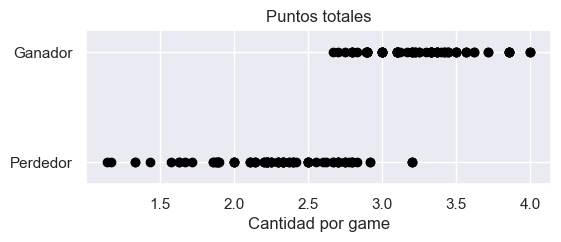

In [29]:
#Puntos totales 
plt.figure(figsize=(6, 2))
plt.scatter(all["pto_tot"], all["result"], color="black")
plt.title("Puntos totales")
plt.yticks([0,1],["Perdedor","Ganador"])
plt.xlabel("Cantidad por game")
plt.margins(y=0.2)  # Ajusta el margen vertical

En el grafico se puede apreciar a simple vista que los ganadores del set suelen hacer mas puntos por set
de promedio. Hay partidos muy parejos en los cuales los perdedores han hecho mas de 2.6 puntos por set. Se puede intuir que para ganar hay que promediar mas de 2.6 puntos por game

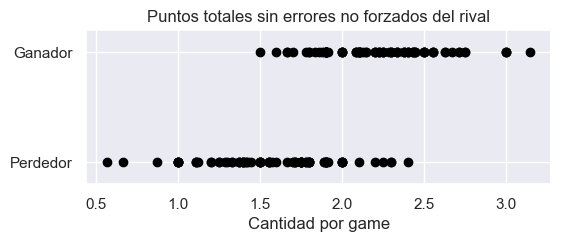

In [30]:
#Puntos totales sin errores no forzados del rival 
plt.figure(figsize=(6, 2))
plt.scatter(all["tot_snf"], all["result"], color="black")
plt.title("Puntos totales sin errores no forzados del rival")
plt.yticks([0,1],["Perdedor","Ganador"])
plt.xlabel("Cantidad por game")
plt.margins(y=0.2)  # Ajusta el margen vertical

Teniendo en cuenta que para ganar el set, hay que promediar 2.6 puntos por game como minimo, equipos
que promedien mas de 2.4 puntos sin errores no forzados, ganan el partido el 100% de las veces, ya que
a los puntos que hacen hay que sumarle los puntos de los errores no forzados del rival